# TEMPO Satellite Plots for June 29

On June 29th, the B200 completed two flights: one planned for a 16:00 UTC (09:00 PDT) takeoff and another planned for a 19:00 (12:00) takeoff. TEMPO data is currently available for 00:00-01:00, 14:00-16:00, and 19:00-23:00 UTC for June 29th. Since TEMPO data is not available from 16:00 to 19:00 UTC, only the second flight of the day's corresponding TEMPO data is plotted below.

## Setting Up Notebook

In [1]:
!pip install pyrsig

  Using cached pyrsig-0.8.4-py3-none-any.whl.metadata (4.1 kB)
Using cached pyrsig-0.8.4-py3-none-any.whl (197 kB)


In [2]:
!pip install pycno

  Using cached pycno-0.3.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pycno-0.3.2-py3-none-any.whl (149 kB)


In [3]:
# Importing libraries
import xarray as xr
import pyrsig 
import pandas as pd
import pycno
import matplotlib.pyplot as plt
import math
import statistics as stat
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [4]:
# # Limiting the size of displayed dataframes. Can be commented out for viewing whole dataframe
# pd.set_option("display.max_rows", 10)
# pd.set_option("display.max_columns", 8)

## June 29 Flight #2 TEMPO Data

Note: the B200 started its spiral at 20:30 UTC (13:30 PDT), peaked at 20:41 (13:41), and finished at 20:55 (13:55). The latitude and longitude of this spiral was approximately 32.8521° x -115.5059°. 

In [5]:
locname = 'b200_june_29_flight_2'
lat_coord= 32.8521
long_coord= -115.5059
bbox = (long_coord - 0.5, lat_coord - 0.5, long_coord + 0.5, lat_coord + 0.5) # Limiting region to area of spiral
bdate = '2024-06-29'

In [6]:
# Getting access to the Remote Sensing Information Gateway (RSIG) data's API

api = pyrsig.RsigApi(bdate=bdate, bbox=bbox, workdir=locname, gridfit=True)
api_key = 'anonymous'  # using public data, so using anonymous
api.tempo_kw['api_key'] = api_key

In [7]:
# after the cell runs, click on the table button.
# Then use filters to find tempo data products by names that start with tempo
# This enables you to see what data products are available
# NOTE: descdf.query('name.str.contains("tempo")') shows all tempo data products you can access //
# (good for plotting different variables than NO2)

descdf = api.descriptions()
descdf
descdf.query('name.str.contains("tempo.l2.no2")')

,name,label,description,bbox_str,beginPosition,timeResolution,endPosition,prefix
1309,tempo.l2.no2.solar_zenith_angle,l2.no2.solar_zenith_angle(deg),Solar zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1310,tempo.l2.no2.solar_azimuth_angle,l2.no2.solar_azimuth_angle(deg),Solar azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1311,tempo.l2.no2.viewing_zenith_angle,l2.no2.viewing_zenith_angle(deg),Viewing zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1312,tempo.l2.no2.viewing_azimuth_angle,l2.no2.viewing_azimuth_angle(deg),Viewing azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1313,tempo.l2.no2.relative_azimuth_angle,l2.no2.relative_azimuth_angle(deg),Relative azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1314,tempo.l2.no2.vertical_column_total,l2.no2.vertical_column_total(molecules/cm2),Nitrogen dioxide vertical column determined fr...,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1315,tempo.l2.no2.vertical_column_total_uncertainty,l2.no2.vertical_column_total_uncertainty(molec...,Nitrogen dioxide vertical column uncertainty.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1316,tempo.l2.no2.vertical_column_troposphere,l2.no2.vertical_column_troposphere(molecules/cm2),Troposphere nitrogen dioxide vertical column.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1317,tempo.l2.no2.vertical_column_troposphere_uncer...,l2.no2.vertical_column_troposphere_uncertainty...,Troposphere nitrogen dioxide vertical column u...,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1318,tempo.l2.no2.vertical_column_stratosphere,l2.no2.vertical_column_stratosphere(molecules/...,Stratosphere nitrogen dioxide vertical column.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo


In [8]:
# Choosing to map TEMPO's vertical column NO2
tempokey = 'tempo.l2.no2.vertical_column_troposphere'

In [9]:
# Creating a data frame with time as the index
# xdr is used here for speed
df = api.to_dataframe(tempokey, backend='xdr')
df_time_index = df.set_index("Timestamp(UTC)")
df_time_index

Using cached: b200_june_29_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-06-29T000000Z_2024-06-29T235959Z.xdr.gz


,LONGITUDE(deg),LATITUDE(deg),no2_vertical_column_troposphere(molecules/cm2),Longitude_SW(deg),Longitude_SE(deg),Longitude_NW(deg),Longitude_NE(deg),Latitude_SW(deg),Latitude_SE(deg),Latitude_NW(deg),Latitude_NE(deg)
Timestamp(UTC),,,,,,,,,,,
2024-06-29T00:20:00+0000,-115.022400,32.997402,1.823989e+15,-114.995596,-115.055075,-114.989513,-115.048952,33.004999,33.007922,32.986925,32.989822
2024-06-29T00:20:00+0000,-115.016281,32.979305,1.932427e+15,-114.989513,-115.048952,-114.983433,-115.042776,32.986925,32.989822,32.968853,32.971668
2024-06-29T00:20:00+0000,-115.075485,32.982227,1.313350e+15,-115.048952,-115.108068,-115.042776,-115.101816,32.989822,32.992393,32.971668,32.974175
2024-06-29T00:20:00+0000,-115.134377,32.984322,2.487572e+15,-115.108068,-115.167391,-115.101816,-115.161190,32.992393,32.994955,32.974175,32.976806
2024-06-29T00:20:00+0000,-115.194160,32.987396,3.181381e+15,-115.167391,-115.227341,-115.161190,-115.221161,32.994955,32.997674,32.976806,32.979564
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29T23:40:00+0000,-115.737389,32.013157,3.856777e+14,-115.712137,-115.766735,-115.706289,-115.761251,32.021650,32.020226,32.003980,32.002929
2024-06-29T23:40:00+0000,-115.790718,32.010120,6.581850e+14,-115.766735,-115.822248,-115.761251,-115.816702,32.020226,32.019100,32.002929,32.001757
2024-06-29T23:40:00+0000,-115.848167,32.010677,3.605456e+14,-115.822248,-115.880171,-115.816702,-115.874090,32.019100,32.020498,32.001757,32.002645


In [10]:
# Do it again, but cleanup the keys and add time object
# Notice that the file is reused
df = api.to_dataframe(tempokey, unit_keys=False, parse_dates=True, backend='xdr')
df

Using cached: b200_june_29_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-06-29T000000Z_2024-06-29T235959Z.xdr.gz


,Timestamp,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,Longitude_SW,Longitude_SE,Longitude_NW,Longitude_NE,Latitude_SW,Latitude_SE,Latitude_NW,Latitude_NE,time
0,2024-06-29T00:20:00+0000,-115.022400,32.997402,1.823989e+15,-114.995596,-115.055075,-114.989513,-115.048952,33.004999,33.007922,32.986925,32.989822,2024-06-29 00:20:00+00:00
1,2024-06-29T00:20:00+0000,-115.016281,32.979305,1.932427e+15,-114.989513,-115.048952,-114.983433,-115.042776,32.986925,32.989822,32.968853,32.971668,2024-06-29 00:20:00+00:00
2,2024-06-29T00:20:00+0000,-115.075485,32.982227,1.313350e+15,-115.048952,-115.108068,-115.042776,-115.101816,32.989822,32.992393,32.971668,32.974175,2024-06-29 00:20:00+00:00
3,2024-06-29T00:20:00+0000,-115.134377,32.984322,2.487572e+15,-115.108068,-115.167391,-115.101816,-115.161190,32.992393,32.994955,32.974175,32.976806,2024-06-29 00:20:00+00:00
4,2024-06-29T00:20:00+0000,-115.194160,32.987396,3.181381e+15,-115.167391,-115.227341,-115.161190,-115.221161,32.994955,32.997674,32.976806,32.979564,2024-06-29 00:20:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2024-06-29T23:40:00+0000,-115.737389,32.013157,3.856777e+14,-115.712137,-115.766735,-115.706289,-115.761251,32.021650,32.020226,32.003980,32.002929,2024-06-29 23:40:00+00:00
907,2024-06-29T23:40:00+0000,-115.790718,32.010120,6.581850e+14,-115.766735,-115.822248,-115.761251,-115.816702,32.020226,32.019100,32.002929,32.001757,2024-06-29 23:40:00+00:00
908,2024-06-29T23:40:00+0000,-115.848167,32.010677,3.605456e+14,-115.822248,-115.880171,-115.816702,-115.874090,32.019100,32.020498,32.001757,32.002645,2024-06-29 23:40:00+00:00
909,2024-06-29T23:40:00+0000,-115.905876,32.012253,1.013678e+15,-115.880171,-115.939152,-115.874090,-115.933018,32.020498,32.023050,32.002645,32.005161,2024-06-29 23:40:00+00:00


In [11]:
# Making an hourly average since TEMPO returns hourly measurements
hdf = df.groupby(pd.Grouper(key='time', freq='1h')).mean(numeric_only=True)
hdf

,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,Longitude_SW,Longitude_SE,Longitude_NW,Longitude_NE,Latitude_SW,Latitude_SE,Latitude_NW,Latitude_NE
time,,,,,,,,,,,
2024-06-29 00:00:00+00:00,-115.501660,32.498702,2.151283e+15,-115.475401,-115.534084,-115.469247,-115.527904,32.506733,32.508684,32.488705,32.490647
2024-06-29 01:00:00+00:00,-115.496843,32.504798,2.219903e+15,-115.470578,-115.529274,-115.464423,-115.523094,32.512806,32.514797,32.494776,32.496760
2024-06-29 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-29 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-29 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-29 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-29 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-29 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-29 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


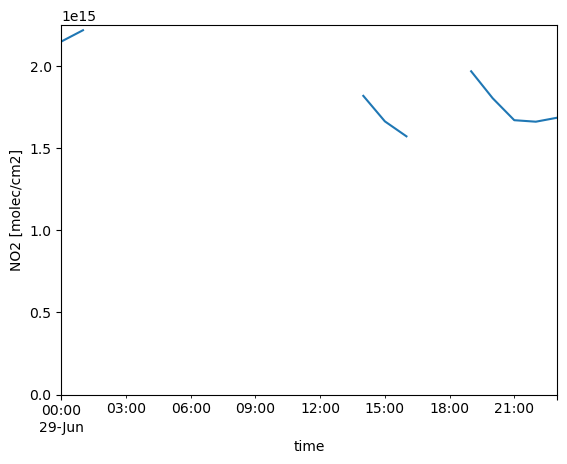

In [12]:
# Plot a data column selected from the names above
# This also allows us to visually see what times have data
tempocol = 'no2_vertical_column_troposphere'
ax = hdf[tempocol].plot(ylim=(0, None), ylabel='NO2 [molec/cm2]')

In [13]:
# Now retrieve a NetCDF file with IOAPI coordinates (like CMAQ)
# Might produce an error about the remote connection; rerunning the cell should fix it.
ds = api.to_ioapi(tempokey)
ds

Using cached: b200_june_29_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-06-29T000000Z_2024-06-29T235959Z.nc.gz
Using cached: b200_june_29_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-06-29T000000Z_2024-06-29T235959Z.nc


<xarray.Dataset> Size: 39kB
Dimensions:          (TSTEP: 24, VAR: 4, DATE-TIME: 2, LAY: 1, ROW: 9, COL: 11)
Coordinates:
  * TSTEP            (TSTEP) datetime64[ns] 192B 2024-06-29 ... 2024-06-29T23...
  * LAY              (LAY) float32 4B 0.9975
  * ROW              (ROW) float64 72B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5
  * COL              (COL) float64 88B 0.5 1.5 2.5 3.5 4.5 ... 7.5 8.5 9.5 10.5
Dimensions without coordinates: VAR, DATE-TIME
Data variables:
    TFLAG            (TSTEP, VAR, DATE-TIME) int32 768B ...
    LONGITUDE        (TSTEP, LAY, ROW, COL) float32 10kB ...
    LATITUDE         (TSTEP, LAY, ROW, COL) float32 10kB ...
    COUNT            (TSTEP, LAY, ROW, COL) int32 10kB ...
    NO2_VERTICAL_CO  (TSTEP, LAY, ROW, COL) float32 10kB ...
Attributes: (12/34)
    IOAPI_VERSION:  1.0 1997349 (Dec. 15, 1997)
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2024213
    CTIME:          2116
    WDATE:          2024213
    ...             ...
    GDNAM:          M_02_99BRACE    
    UPNAM:          XDRConvert      
    VAR-LIST:       LONGITUDE       LATITUDE        COUNT           NO2_VERTI...
    FILEDESC:       http://tempo.si.edu/,TEMPOSubset,XDRConvert              ...
    HISTORY:        XDRConvert
    crs_proj4:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [14]:
# Choose a column from above, notice that names are truncated, so they can be weird
tempoikey = 'NO2_VERTICAL_CO'

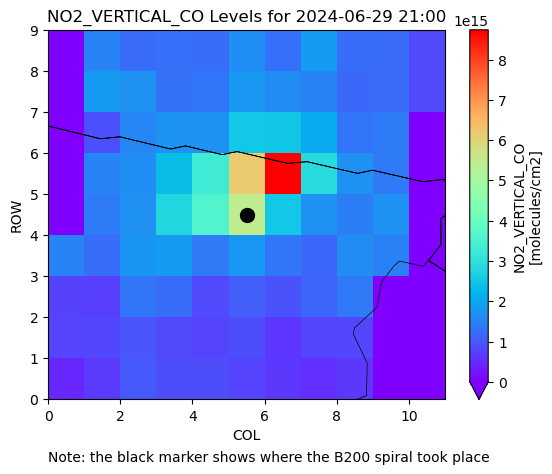

In [15]:
# Now plot a map using the pycno gridding package
# Documentation for the pycno package can be found in Dr. Hendrickson's GitHub
cno = pycno.cno(ds.crs_proj4)
time= 21 # Choose the UTC hour you'd like to plot
qm = ds[tempoikey].isel(TSTEP=time)

qm.plot(cmap='rainbow', vmin=0, vmax=qm.max().values) # Plotting with the desired colormap and handling missing values
cno.drawstates(resnum=1)

# Plotting a point on the graph using array indices
row_index = 4.5  # Center of the grid
col_index = 5.5  # Center of the grid
plt.scatter(col_index, row_index, color='black', s=100, zorder=5)  # Adjust the color, size (s), and zorder as needed


plt.title(f'{tempoikey} Levels for {bdate} {time}:00')
plt.text(0, -1.5, "Note: the black marker shows where the B200 spiral took place")
plt.show()

In [16]:
# Now that we've graphed where the spiral took place via rows and columns, we can pull the TEMPO data value
values= ds.NO2_VERTICAL_CO.isel(COL= math.floor(col_index), ROW= math.floor(row_index)).values

# Pulling the TEMPO satellite value at desired time for this spiral
tempo_val= float(values[time])
print(f'TEMPO satellite {tempoikey} value is {tempo_val: .2e} ({tempo_val}) molec/cm^2 for {bdate} {time}:00 UTC')

TEMPO satellite NO2_VERTICAL_CO value is  5.45e+15 (5451502130823168.0) molec/cm^2 for 2024-06-29 21:00 UTC


## B200 Flight #2 Flight Data

In [17]:
# Pulling data that was preprocessed in Excel
# The first few columns (before the first unnamed column) show the raw flight data for the spiral
# The next group of columns includes averaged data based on altitude
# temp_avg and press_avg are in Kelvin and atm, respectively
# Directly after that (with no unnamed column separating it), the molec_coeff... columns show the process //
# of converting the airborne data from pptv to molec/cm^2
# The column total_no2 shows the summed total of NO2 molecules in the spiral column, aiding in comparison //
# with the TEMPO satellite data (which is in molec/cm^2)
main_df= pd.read_csv("/home/jovyan/Flight Data/6_29_f2_no2_data.csv")
main_df

,Time_Start,Time_Stop,Latitude_deg_THORNHILL,Longitude_deg_THORNHILL,gpsALT_ft_THORNHILL,Tstat_degC_THORNHILL,Pstat_mb_THORNHILL,NO2_CANOE_STCLAIR,Unnamed: 8,Unnamed: 9,...,press_avg,molec_coeff,conv_coeff,conv_NO2_avg,total_no2,Unnamed: 20,average NO2 level,Unnamed: 22,Unnamed: 23,el centro elevation (ft)
0,73800,73801,32.864483,-115.559810,1139.11,35.54,965.90,626.0,NaN,NaN,...,0.979554812,246000000.0,3.5188E+12,2.83098E+15,3.461380e+15,NaN,420.5441667,NaN,NaN,-20.627386
1,73801,73802,32.865571,-115.560656,1105.02,35.60,968.24,718.0,NaN,NaN,...,0.968036434,246000000.0,3.48852E+12,2.40868E+15,NaN,NaN,NaN,NaN,NaN,NaN
2,73802,73803,32.865571,-115.560656,1105.02,35.60,968.24,647.0,NaN,NaN,...,0.950869863,246000000.0,3.43434E+12,2.29299E+15,NaN,NaN,peak altitude NO2 level,NaN,NaN,NaN
3,73803,73804,32.866674,-115.561496,1070.54,35.69,968.84,612.0,NaN,NaN,...,0.933691819,246000000.0,3.39621E+12,2.29148E+15,NaN,NaN,10872.2,NaN,NaN,NaN
4,73804,73805,32.866674,-115.561496,1070.54,35.69,968.84,512.0,NaN,NaN,...,0.919124021,246000000.0,3.35972E+12,1.87027E+15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,75296,75297,32.998793,-115.644895,1767.07,34.25,947.13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,75297,75298,33.000062,-115.646104,1774.57,34.33,946.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,75298,75299,33.000062,-115.646104,1774.57,34.33,946.74,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499,75299,75300,33.001324,-115.647301,1778.84,34.36,946.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Pulling total_no2 value for comparative statistics
total_no2= main_df['total_no2'][0]
print(f'Flight data {tempoikey} value is {total_no2: .2e} ({total_no2}) molec/cm^2 for this spiral')

Flight data NO2_VERTICAL_CO value is  3.46e+15 (3461380000000000.0) molec/cm^2 for this spiral
